# News Event EDA
--------------------------
We scraped news event from wikipidia and would like to see how it count possibly related to Crypto-currency

In [1]:
%load_ext autoreload
%autoreload 2
# Set up and import data
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import numpy as np

#pd.describe_option()
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', -1)

data_location = \
    '/home/gunsliver/Workspace/Project/733Project/CryptViz/Scrapers/News/WikipediaEvent/WikiEvent.json'

news = pd.read_json(data_location)

# Add year, date-of-year, date-of-month
news['year'] = news['date'].apply(lambda x: x.year)
news['month'] = news['date'].apply(lambda x: x.month)
news['doy'] = news['date'].apply(lambda x: x.dayofyear)

In [2]:
# Enlarge display size
pd.set_option('display.max_colwidth', -1)

keywords = ['Bitcoin', 'Bitcoin Cash', 'Litecoin', 'Cardano', 'Satoshi Nakamoto',
            'NEO', 'Stellar', 'IOTA', 'Monero', 'NEM', 'Ethereum Classic', 'VeChain', 'Lisk', 
            'Qtum', 'Bitcoin Gold', 'Bytecoin', 'Binance Coin', 'Dogecoin', 
            'DigixDAO', 'BitShares', 'KuCoin Shares', 'Cryptonex', 'MonaCoin', 
            'QASH', 'PIVX', 'Bitcore', 'ReddCoin', 'GXShares', 'ZCoin', 'MaidSafeCoin', 
            'Vertcoin', 'Particl', 'Enigma', 'Neblio', 'Emercoin', 'TenX', 'Blocknet', 
            'SmartCash', 'GameCredits']

(news[news['news_header'].str.contains('|'.join(keywords))])[['category','date','news_header']]

,category,date,news_header
19003,NaN,2009-01-03,Satoshi Nakamoto creates the genesis block of bitcoin. (bitcoin.it)
24083,NaN,2010-03-14,"A massive power outage occurs in parts of Chile, including Santiago, with ONEMI working to restore service. (Santiago Times)"
45808,Business and economy,2013-11-27,"The price of one Bitcoin breaks above $1,000 for the first time, and marks a rise of over 7,600 percent so far this year. ()"
46125,Business and economy,2013-12-26,The Reserve Bank of India warns users of risks involved in virtual currencies such as Bitcoin and Dogecoin. (T.I.P. News)
46404,Business and economy,2014-01-21,"First time in the history of digital currency, two Las Vegas casinos begin to accept Bitcoin. (Forbes)"
52359,Law and crime,2015-09-11,"Mark Karpele?s, the CEO of defunct Bitcoin exchange Mt. Gox, is charged with embezzlement in Japan. Karpeles asserts his own innocence. (AFP via France 24)"
53770,Law and crime,2015-12-09,"The Australian Federal Police raid the Sydney home of Craig Steven Wright ? whom media today claimed was suspected to be Satoshi Nakamoto, the founder of Bitcoin ? in relation to possible tax offences. (ABC News Australia)"
55889,Business and economy,2016-05-02,"Australian tech entrepreneur Craig Steven Wright claims he is Satoshi Nakamoto, the creator of the Bitcoin currency. There are about 15.5 million bitcoins in circulation. However, questions have been raised as to authenticity of his assertion. () (BBC) (2) (AP via )"


# Lets do sentiment analysis for news
-------------------------------------------------
Vader can help us to do the job

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

sid = SentimentIntensityAnalyzer()
news['score']=news['news_header'].apply(lambda x:sid.polarity_scores(x)['compound'])

/sharesoft/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [69]:
bad_news = news[(news['date']>='2014-01-01') & (news['score'] <= 0)]
good_news = news[(news['date']>='2014-01-01') & (news['score'] >= 0)]

# What are the categories? Lets check the distrubition.

In [5]:
category = news['category'].dropna().unique()
counts = news.groupby(['category']).size().to_frame(name='counts')
counts

,counts
category,
Accidents,1
Accidents and Disasters,1
Accidents and disasters,14
Architecture,1
Armed Conflicts and attacks,2
Armed attacks,3
Armed attacks and conflicts,48
Armed conflict,7
Armed conflict and attack,5


# Entity resolution to resolve head line issue

In [6]:
import math

def alphnum(s):
    sep = re.compile(r"[\W]")
    items = sep.split(s)
    return " ".join([item for item in items if item.strip()!=""])

def wordset(s, lower_case = True, alphanum_only = True):
    if lower_case:
        s = s.lower()
    if alphanum_only:
        s = alphnum(s)
    return s.split()

def idf(docs):
    word_to_idf = {}
    word_to_count = {}
    for doc in docs:
        flags = {}
        for w in doc:
            if w in flags:
                continue
            flags[w] = True
            word_to_count[w] = word_to_count.get(w, 0) + 1
    for w, c in word_to_count.items():
        word_to_idf[w] = math.log(len(docs)*1.0/c)
    return word_to_idf

k_o_list = [(wordset(row) , row) for row in category.tolist()] 
k_list = [k for k, o in k_o_list]
word_to_idf = idf(k_list)
max_idf = math.log(len(k_list)*2.0)

def get_idf(word):
    return word_to_idf.get(word, max_idf)
    
def sum_weight(words):
    sum_weight = 0
    for w in words:
        sum_weight += get_idf(w)
    return sum_weight
    
def jaccard(s, t, threshold=0.3):
    sum1 = sum_weight(s)
    sum2 = sum_weight(t)
    if sum1 < sum2:
        if sum1 < sum2*threshold:
            return 0
    else:
        if sum2 < sum1*threshold:
            return 0
    intersect = sum_weight(set(s) & set(t))
    union = sum1+sum2-intersect

    if union != 0 and intersect*1.0/union+1e-6 >= threshold:
        return intersect*1.0/union
    else:
        return 0

def addlist(iset, item, l):
    if len(l) == 0:
        return iset, l
    for i in l:
        if jaccard(item[0], i[0]) > 0:
            iset.append(i)
            l.remove(i)
            addlist(iset, i, l)
    return iset, l
            
groups = []
for i, v1 in enumerate(k_o_list):
    iset = []
    iset, l = addlist(iset, v1, k_o_list[i:])
    k_o_list = l
    if len(iset) > 0:
        iset.append(v1)
        groups.append((iset))

mapping = dict()
for group in groups:
    
    text = [v for k,v in group]
    #print(text)
    target = max(text, key=len)
    #print(target)
    for i in text:
        mapping[i]=target

#print(mapping)
news['category'] = news['category'].replace(mapping)

In [7]:
mapping

{'Accidents': 'Armed conflicts and incidents',
 'Accidents and Disasters': 'Armed conflicts and incidents',
 'Accidents and disasters': 'Armed conflicts and incidents',
 'Armed Conflicts and attacks': 'Armed conflicts and incidents',
 'Armed attacks': 'Armed conflicts and incidents',
 'Armed attacks and conflicts': 'Armed conflicts and incidents',
 'Armed conflict': 'Armed conflicts and incidents',
 'Armed conflict and attack': 'Armed conflicts and incidents',
 'Armed conflict and attacks': 'Armed conflicts and incidents',
 'Armed conflict and incidents': 'Armed conflicts and incidents',
 'Armed conflicts': 'Armed conflicts and incidents',
 'Armed conflicts and attack': 'Armed conflicts and incidents',
 'Armed conflicts and attacks': 'Armed conflicts and incidents',
 'Armed conflicts and incidents': 'Armed conflicts and incidents',
 'Art and culture': 'Arts, culture and entertainment',
 'Arts & Culture': 'Arts, culture and entertainment',
 'Arts and Culture': 'Arts, culture and enterta

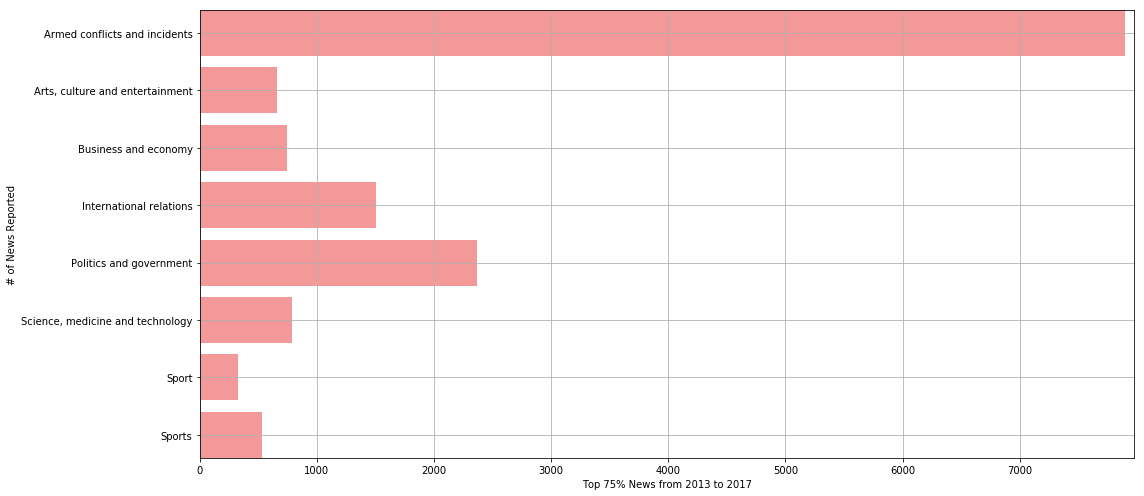

In [56]:
import matplotlib.pyplot as plt
import numpy as np

years = news[(news['year'] >= 2014)]
category = years['category'].unique()
counts = years.groupby(['category']).size().to_frame(name='counts')
top = counts.quantile(.75).values[0]
t_counts = counts[counts['counts']>top].sort_values(by='counts', ascending=False)

x = t_counts.index
y = t_counts.values.ravel()

fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(111)

ax.set(xlabel='Top 75% News from 2013 to 2017', ylabel='# of News Reported')
ax.barh(x, y, color='lightcoral', align='center', alpha=0.8)
ax.invert_yaxis()
ax.grid()
ax.margins(x=0.01, y=0)

plt.tight_layout()
plt.show()

# How is it related to Crypto-currency?

In [11]:
%matplotlib inline
from Scrapers.Coinmarketcap import coinmarketcap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cmk = coinmarketcap.CoinMarketcap()
coin_names = cmk.coin_names()

In [12]:
coins = cmk.coins()
coin_data = [coin.json() for coin in coins]
coin_data = pd.DataFrame(coin_data)

In [13]:
bitcoin = coins[0]
btc_repo = bitcoin.repo()
start, end = '20140101', '20180228'
bitcoin.get_history(start, end)
btc_history = bitcoin.read_history()
btc_history['dt'] = pd.to_datetime(btc_history['Date'])

In [96]:
#x = btc_history['dt']
sorce_per_date = news[news['date']>='2014-01-01'].groupby(['date']).sum().reset_index()
btc = btc_history[btc_history['dt'] < '2017-10-01']
x = sorce_per_date['date']
y = btc['Market Cap'] / 1e9

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(x, y, linewidth=2)
plt.plot(x, sorce_per_date, linewidth=2)
plt.xlabel('Date')

plt.ylabel('Market Cap (Billions)')
plt.title("Bitcoin's Market Cap. 2014 - 2018")
plt.grid(True)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f09799f11e0> (for post_execute):


ValueError: ordinal must be >= 1

ValueError: ordinal must be >= 1

In [74]:
btc_history[btc_history['dt'] < '2017-10-01' ].shape

(1369, 9)

In [ ]:
btc_history['Market Cap'] / 1e9

In [91]:
sorce_per_date.shape
#good_news_per_day = good_news.groupby(['date']).size().to_frame(name='counts')

(1369, 5)

In [70]:
#print(bad_news_per_day.shape)
#btc_history['dt']
#dt = new.groupby(['date']).size
dpm = bad_news.groupby(['year','month','date']).size().to_frame(name='counts').reset_index()
#news[(news['month']==1) &(news['year']==2013)].shape

In [72]:
dpm.groupby(['year','month']).size().to_frame(name='counts')

counts
year month        
2014 1      31    
     2      28    
     3      31    
     4      30    
     5      31    
     6      30    
     7      31    
     8      31    
     9      30    
     10     31    
     11     30    
     12     31    
2015 1      31    
     2      28    
     3      30    
     4      30    
     5      31    
     6      30    
     7      31    
     8      31    
     9      30    
     10     31    
     11     30    
     12     31    
2016 1      31    
     2      29    
     3      31    
     4      30    
     5      31    
     6      30    
     7      31    
     8      31    
     9      30    
     10     31    
     11     30    
     12     31    
2017 1      31    
     2      28    
     3      31    
     4      30    
     5      31    
     6      30    
     7      31    
     8      31    
     9      30

In [67]:
from datetime import datetime, date
#datetime(2002, 12, 25, tzinfo=TZ()).isoformat(' ')
datetime(2016,1,1) - datetime(2015, 1, 1)

datetime.timedelta(365)

In [ ]:
btc_history.merge()